In [1]:
from sklearn import linear_model
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

logistic = linear_model.LogisticRegression(solver="newton-cg", tol=1)
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(steps=[("rbm", rbm), ("logistic", logistic)])

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False, cache=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X = mnist.data.astype('float32')
X /= 255.0
y = mnist.target.astype('int64')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
from sklearn.base import clone

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 20

# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 20
logistic.C = 10.0

# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(X_train, y_train)

# Training the Logistic regression classifier directly on the pixel
raw_pixel_classifier = clone(logistic)
raw_pixel_classifier.C = 100.0
raw_pixel_classifier.fit(X_train, y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -163.99, time = 2.73s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -152.56, time = 3.29s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -148.15, time = 3.18s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -141.66, time = 4.37s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -139.01, time = 3.68s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -138.08, time = 4.44s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -134.93, time = 8.98s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -134.54, time = 4.19s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -133.46, time = 4.30s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -133.36, time = 3.15s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -131.40, time = 3.24s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -132.27, time = 3.16s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -129.66, time = 4.29s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -130.74, time = 3.13s
[BernoulliRBM] 

KeyboardInterrupt: 

In [ ]:
from sklearn import metrics

Y_pred = rbm_features_classifier.predict(X_test)
print(
    "Logistic regression using RBM features:\n%s\n"
    % (metrics.classification_report(y_test, Y_pred))
)

In [ ]:
Y_pred = raw_pixel_classifier.predict(X_test)
print(
    "Logistic regression using raw pixel features:\n%s\n"
    % (metrics.classification_report(y_test, Y_pred))
)

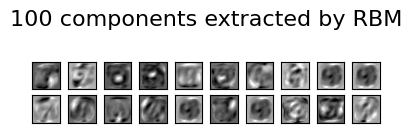

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())
plt.suptitle("100 components extracted by RBM", fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

In [7]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Notebooks/

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [8]:
import pandas as pd

csv_file = pd.read_csv('./st.csv', header=0, sep='!;')
csv_file.head()

<ipython-input-8-f4057f2ad1e1>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  csv_file = pd.read_csv('./st.csv', header=0, sep='!;')


,file_name,text
0,4375e58a64.png,"\left[ D _ { f } , D \right] = 0 \, ."
1,489da689b3.png,1 + \frac { 2 \pi \Lambda G } { 9 \alpha } > 0
2,e2da14260e.png,\ddot { h } = - \nabla _ { h } \Phi
3,490a32bf20.png,"\langle f , f \rangle = \langle g , g \rangle ..."
4,68641b1f35.png,{ \cal P } : \quad


In [16]:
import numpy as np

path = r'./small_imgs/'
x_set = []

for i in range(len(csv_file)):
  img = plt.imread(path+csv_file.iat[i,0])
  img = np.array(img).mean(axis=2)
  x_set.append(img)

x_flset = []
pics = []

for el in x_set:
  x_flset.append(el.reshape(-1))
  pics.append(len(el.reshape(-1)))

x = np.zeros((953, 61440))
for i in range(953):
  x[i,0:len(x_flset[i])] = x_flset[i].reshape((1,len(x_flset[i])))

y = csv_file.iloc[:,1].values

In [10]:
y[:10]

array(['\\left[ D _ { f } , D \\right] = 0 \\, .',
       '1 + \\frac { 2 \\pi \\Lambda G } { 9 \\alpha } > 0',
       '\\ddot { h } = - \\nabla _ { h } \\Phi',
       '\\langle f , f \\rangle = \\langle g , g \\rangle = 0 .',
       '{ \\cal P } : \\quad', '\\Psi = { C } \\Psi ^ { \\ast } \\, .',
       '\\mathrm { c } = \\frac { \\theta } { n } ,', 'f ( - 2 p )',
       'f ( \\mu ) = \\pi - f ( \\pi - \\mu ) .',
       '( 1 - P ) \\, a \\, T \\ = \\ 0 \\quad ,'], dtype=object)

In [23]:
# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(x[:600], y[:600])

# Training the Logistic regression classifier directly on the pixel
# raw_pixel_classifier = clone(logistic)
# raw_pixel_classifier.C = 100.0
# raw_pixel_classifier.fit(x, y)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -5785.74, time = 8.01s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -5545.77, time = 9.14s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -4973.75, time = 4.79s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -5009.04, time = 6.01s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -4480.39, time = 6.11s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -4429.22, time = 5.67s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -4381.14, time = 6.94s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -4455.01, time = 4.81s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -4294.84, time = 4.77s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -3859.31, time = 6.82s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -5177.90, time = 6.84s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -4700.74, time = 6.94s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -4583.89, time = 4.59s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -4526.56, time = 4.86s
[

Pipeline(steps=[('rbm',
                 BernoulliRBM(learning_rate=0.06, n_components=20, n_iter=20,
                              random_state=0, verbose=True)),
                ('logistic',
                 LogisticRegression(C=10.0, solver='newton-cg', tol=1))])

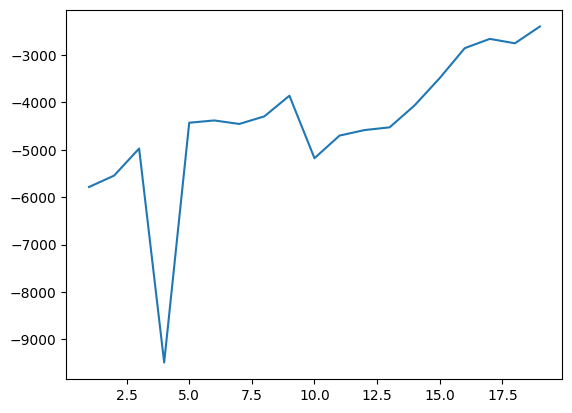

In [25]:
n = np.arange(1,20,1)
p = np.array([-5785.74,-5545.77,-4973.75,-5009.04-4480.39,-4429.22,-4381.14,-4455.01,-4294.84,-3859.31,-5177.90,-4700.74,-4583.89,-4526.56,-4061.71,-3486.63,-2854.80,-2659.22,-2752.97,-2397.67])
plt.plot(n,p)

True target: \frac { \partial u } { \partial a _ { D } } \neq 0
Predicted target:  ['\\begin{array} { r c l } \\end{array}']


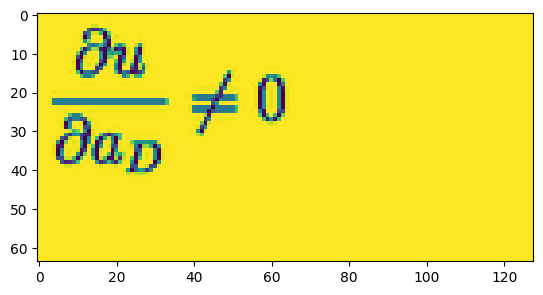

In [41]:
#import numpy as np
n = np.random.randint(len(x))
plt.imshow(x_set[n])#
print('True target: '+y[n])

y_pred = rbm_features_classifier.predict(x[n].reshape((1,len(x[n]))))
print('Predicted target: ',y_pred)

ValueError: cannot reshape array of size 61440 into shape (28,28)

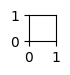

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())
plt.suptitle("100 components extracted by RBM", fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()